In [13]:
 import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.ndimage.filters import gaussian_filter1d
import sqlite3 as sql
import os
import pandas as pd
from datetime import datetime
from glob import glob
import PlaceCellAnalysis as pc
import single_session_plots as ssp
import SimilarityMatrixAnalysis as sm

os.sys.path.append('../')
import utilities as u
import preprocessing as pp
import behavior as b


%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
mouse = '4139212.2'
df = pp.load_session_db()


df = df[df['RewardCount']>20]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]
df_mouse

,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,DateTime,data file,scanfile,scanmat
614,4139212.2,08_10_2018,5,TwoTower_noTimeout,64,1,2018-10-08,G:\My Drive\\VR_Data\TwoTower\4139212.2\08_10_...,G:\My Drive\2P_Data\TwoTower\4139212.2\08_10_2...,G:\My Drive\2P_Data\TwoTower\4139212.2\08_10_2...
616,4139212.2,08_10_2018,7,TwoTower_noTimeout,29,1,2018-10-08,G:\My Drive\\VR_Data\TwoTower\4139212.2\08_10_...,G:\My Drive\2P_Data\TwoTower\4139212.2\08_10_2...,G:\My Drive\2P_Data\TwoTower\4139212.2\08_10_2...
657,4139212.2,10_10_2018,2,TwoTower_noTimeout,60,1,2018-10-10,G:\My Drive\\VR_Data\TwoTower\4139212.2\10_10_...,G:\My Drive\2P_Data\TwoTower\4139212.2\10_10_2...,G:\My Drive\2P_Data\TwoTower\4139212.2\10_10_2...
691,4139212.2,12_10_2018,1,TwoTower_Timeout,38,1,2018-10-12,G:\My Drive\\VR_Data\TwoTower\4139212.2\12_10_...,G:\My Drive\2P_Data\TwoTower\4139212.2\12_10_2...,G:\My Drive\2P_Data\TwoTower\4139212.2\12_10_2...
733,4139212.2,15_10_2018,2,TwoTower_Timeout,45,1,2018-10-15,G:\My Drive\\VR_Data\TwoTower\4139212.2\15_10_...,G:\My Drive\2P_Data\TwoTower\4139212.2\15_10_2...,G:\My Drive\2P_Data\TwoTower\4139212.2\15_10_2...
781,4139212.2,17_10_2018,1,TwoTower_Timeout,46,1,2018-10-17,G:\My Drive\\VR_Data\TwoTower\4139212.2\17_10_...,G:\My Drive\2P_Data\TwoTower\4139212.2\17_10_2...,G:\My Drive\2P_Data\TwoTower\4139212.2\17_10_2...
834,4139212.2,19_10_2018,4,TwoTower_Timeout,43,1,2018-10-19,G:\My Drive\\VR_Data\TwoTower\4139212.2\19_10_...,G:\My Drive\2P_Data\TwoTower\4139212.2\19_10_2...,G:\My Drive\2P_Data\TwoTower\4139212.2\19_10_2...
849,4139212.2,20_10_2018,0,TwoTower_Timeout,42,1,2018-10-20,G:\My Drive\\VR_Data\TwoTower\4139212.2\20_10_...,G:\My Drive\2P_Data\TwoTower\4139212.2\20_10_2...,G:\My Drive\2P_Data\TwoTower\4139212.2\20_10_2...
867,4139212.2,22_10_2018,2,TwoTower_Timeout,39,1,2018-10-22,G:\My Drive\\VR_Data\TwoTower\4139212.2\22_10_...,G:\My Drive\2P_Data\TwoTower\4139212.2\22_10_2...,G:\My Drive\2P_Data\TwoTower\4139212.2\22_10_2...
886,4139212.2,23_10_2018,2,TwoTower_Timeout,62,1,2018-10-23,G:\My Drive\\VR_Data\TwoTower\4139212.2\23_10_...,G:\My Drive\2P_Data\TwoTower\4139212.2\23_10_2...,G:\My Drive\2P_Data\TwoTower\4139212.2\23_10_2...


In [9]:
data = pp.behavior_dataframe([df_mouse['data file'].iloc[i] for i in range(3,df_mouse.shape[0],1)],concat=False)

C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:186: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])
C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:185: RuntimeWarning: Mean of empty slice
  zone0_speed[i]=np.nanmean(sub_frame.loc[zone0_mask,'speed'])


((<matplotlib.figure.Figure at 0x1b00029e6a0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1b00029ee48>),
 (<matplotlib.figure.Figure at 0x1b00021c710>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1b0000e1780>),
 (<matplotlib.figure.Figure at 0x1b000248c18>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1b00012d400>))

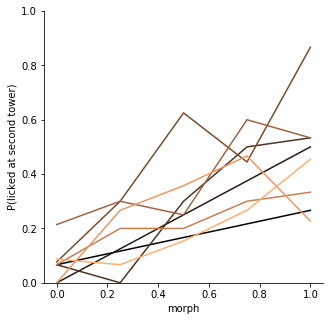

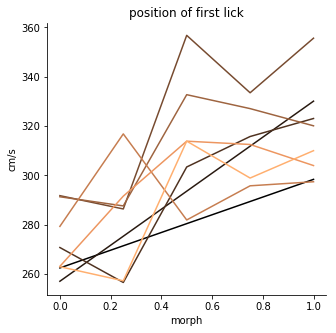

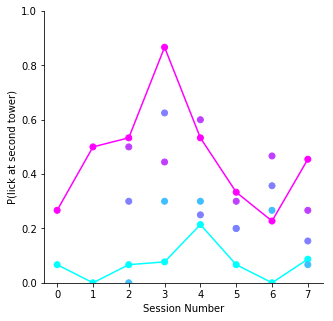

In [10]:
b.learning_curve_plots(data)

In [12]:
# load behavior
sess = df_mouse.iloc[6]
VRDat, C,Cd,S, A = pp.load_scan_sess(sess)

G:\My Drive\2P_Data\TwoTower\4139212.2\19_10_2018\TwoTower_Timeout\TwoTower_Timeout_004_008.mat
26964


C:\Users\mplitt\MightyMorphingPhotonRangers\preprocessing.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


G:\My Drive\2P_Data\TwoTower\4139212.2\19_10_2018\TwoTower_Timeout\TwoTower_Timeout_004_008.mat
#subsystem#not made into numpy array


In [152]:
# by trial info and position binned neural data
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
C_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(C,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values)
C_morph_dict = u.trial_type_dict(C_trial_mat,trial_info['morphs'])
occ_morph_dict = u.trial_type_dict(occ_trial_mat,trial_info['morphs'])

lick_trial_mat,tmp, edges, centers = u.make_pos_bin_trial_matrices(VRDat['lick']._values,
                                        VRDat['pos']._values,
                                        VRDat['tstart']._values,
                                        VRDat['teleport']._values,bin_size=5)
lick_morph_dict = u.trial_type_dict(lick_trial_mat,trial_info['morphs'])
max_pos = np.copy(trial_info['max_pos'])
max_pos[max_pos>440]=np.nan

C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:186: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


C:\Users\mplitt\MightyMorphingPhotonRangers\behavior.py:103: RuntimeWarning: invalid value encountered in true_divide
  rzone_lick_ratio[m] = np.divide(zone0_lick_rate,zone0_lick_rate+zone1_lick_rate)


(<matplotlib.figure.Figure at 0x28c068e8588>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x28c06919a90>,
  <matplotlib.axes._subplots.AxesSubplot at 0x28c06f34c18>))

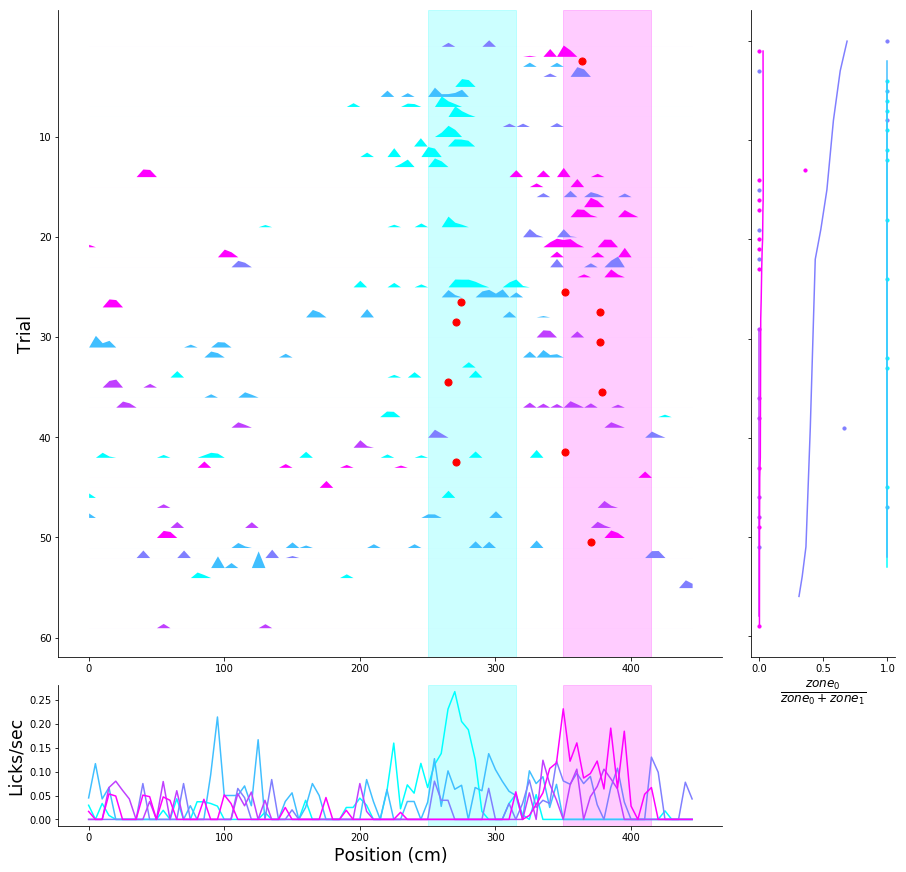

In [153]:
b.lick_plot(lick_morph_dict,edges,max_pos=max_pos,smooth=False)

G:\My Drive\2P_Data\TwoTower\4139219.3\12_10_2018\TwoTower_Timeout\TwoTower_Timeout_002_010.mat
20167


C:\Users\mplitt\MightyMorphingPhotonRangers\preprocessing.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


G:\My Drive\2P_Data\TwoTower\4139219.3\12_10_2018\TwoTower_Timeout\TwoTower_Timeout_002_010.mat
#subsystem#not made into numpy array


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:186: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


(1113,) (809,)
morph 0 place cells = 809 out of 1113 , 0.726864 
morph 1 place cells = 783 out of 1113, 0.703504
common place cells = 588


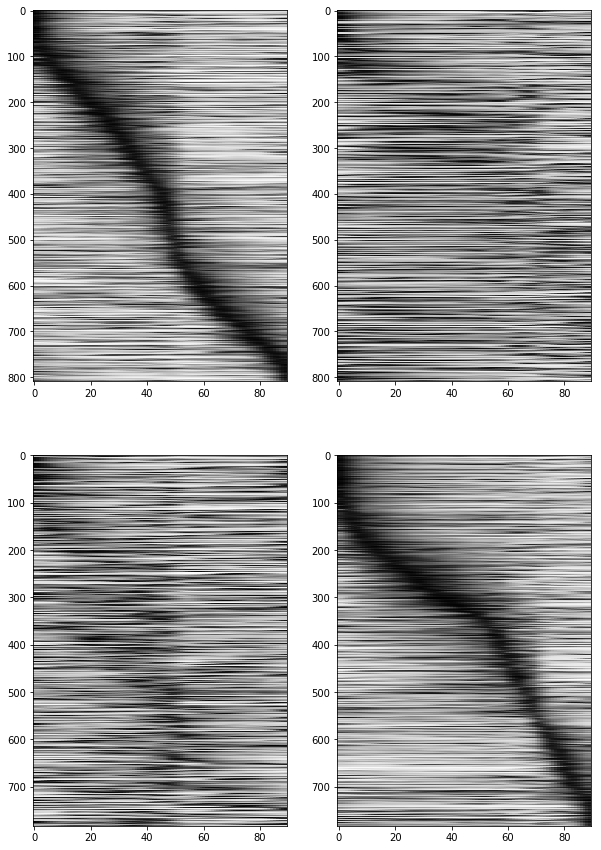

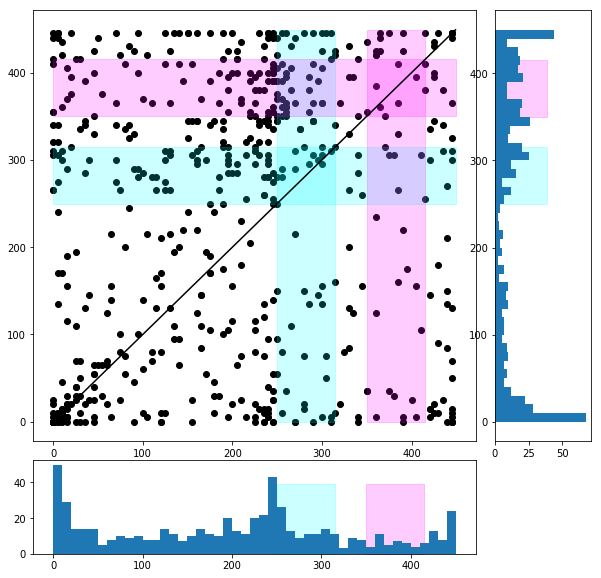

In [162]:
FR, masks, SI = pc.single_session(df_mouse.iloc[3])
# add filtering for correct trials only

In [22]:
# similarity matrix
S, U, U_norm, (f,ax_S), (f_U, ax_U) = sm.single_session(df_mouse.iloc[-2])

G:\My Drive\2P_Data\TwoTower\4139212.2\23_10_2018\TwoTower_Timeout\TwoTower_Timeout_002_004.mat
34383


C:\Users\mplitt\MightyMorphingPhotonRangers\preprocessing.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcas

G:\My Drive\2P_Data\TwoTower\4139212.2\23_10_2018\TwoTower_Timeout\TwoTower_Timeout_002_004.mat
#subsystem#not made into numpy array
(34383, 999)


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:186: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])
C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:185: RuntimeWarning: Mean of empty slice
  zone0_speed[i]=np.nanmean(sub_frame.loc[zone0_mask,'speed'])


indices dict_keys([0.0, 0.25, 0.5, 0.75, 1.0])


AttributeError: 'dict' object has no attribute 'dtype'

In [ ]:
# decoding

In [11]:
S_z = sp.stats.zscore(S,axis=0)
S_z_smooth = gaussian_filter1d(S_z,3,axis=0)
C_z = sp.stats.zscore(C,axis=0)
ssp.run_PCA(Cd,VRDat)

NameError: name 'S' is not defined

In [101]:
a = np.arange(0,250,50)
for (x,y) in zip(a[:-1].tolist(),a[1:].tolist()):
    print(x,y)

0 50
50 100
100 150
150 200
